<a href="https://colab.research.google.com/github/Aayush050502/Top-5-Home-Printers-Ranked/blob/main/Top_5_Home_Printers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# For a local environment, replace with:
printers_df = pd.read_csv('/content/home_printers_comparison.csv')

In [51]:
# Step 2: Define the criteria and their mock scores
criteria = {
    "Faster Scan": [5, 9, 6, 6, 7],
    "Cost per Print": [6, 9, 3, 8, 7],
    "Colour Quality": [5, 7, 9, 6, 7],
    "Speed": [7, 9, 6, 5, 8],
    "Purchasing Cost": [7, 2, 7, 8, 9],
    "Prints Colour": [9, 0, 9, 9, 9]
}

In [52]:
# Convert criteria to DataFrame
criteria_df = pd.DataFrame(criteria)

In [53]:
# Normalize the scores
scaler = MinMaxScaler()
criteria_scaled = scaler.fit_transform(criteria_df)


In [54]:
# Convert back to DataFrame
criteria_scaled_df = pd.DataFrame(criteria_scaled, columns=criteria_df.columns)

In [55]:
# Assign equal weights to all criteria (including the new "Prints Colour")
weights = {
    "Faster Scan": 0.1667,
    "Cost per Print": 0.1667,
    "Colour Quality": 0.1667,
    "Speed": 0.1667,
    "Purchasing Cost": 0.1667,
    "Prints Colour": 0.1667
}


In [56]:
# Calculate the weighted score for each printer
criteria_scaled_df['Weighted Score'] = np.dot(criteria_scaled_df, list(weights.values()))

In [57]:
# Add the weighted score to the original DataFrame
printers_df['Weighted Score'] = criteria_scaled_df['Weighted Score']

In [58]:
# Rank the printers based on the weighted score
printers_df['Rank'] = printers_df['Weighted Score'].rank(ascending=False)

<ipython-input-59-45da8e2f2bbf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weighted Score', y='Printer Model', data=printers_df.sort_values('Rank', ascending=True), palette='viridis')


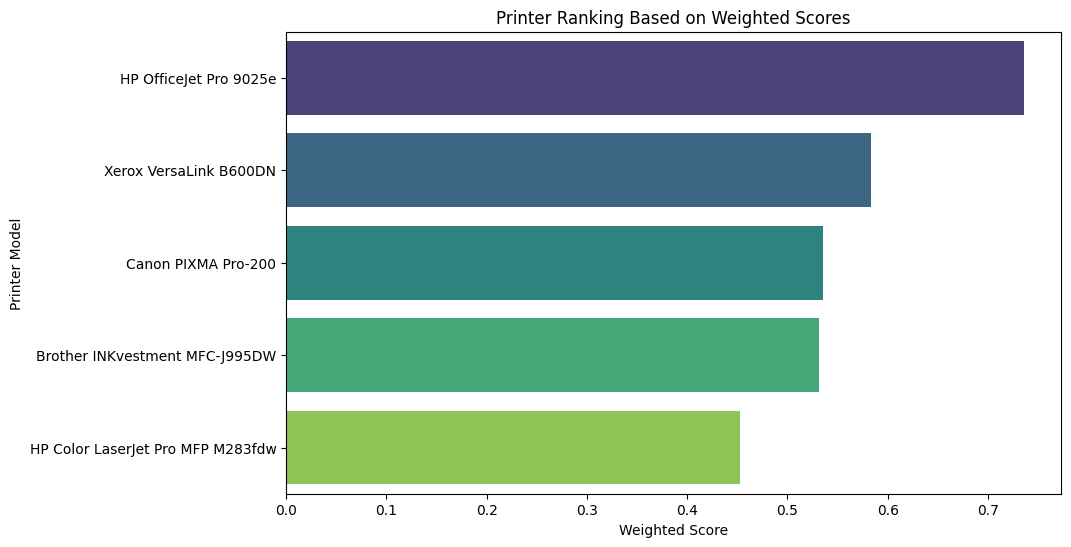

In [59]:
# Step 3: Visualize the Rankings
# Bar plot for Weighted Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted Score', y='Printer Model', data=printers_df.sort_values('Rank', ascending=True), palette='viridis')
plt.title('Printer Ranking Based on Weighted Scores')
plt.xlabel('Weighted Score')
plt.ylabel('Printer Model')
plt.show()

<ipython-input-60-8cc30eca7382>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Printer Model', data=printers_df.sort_values('Rank', ascending=False), palette='viridis')


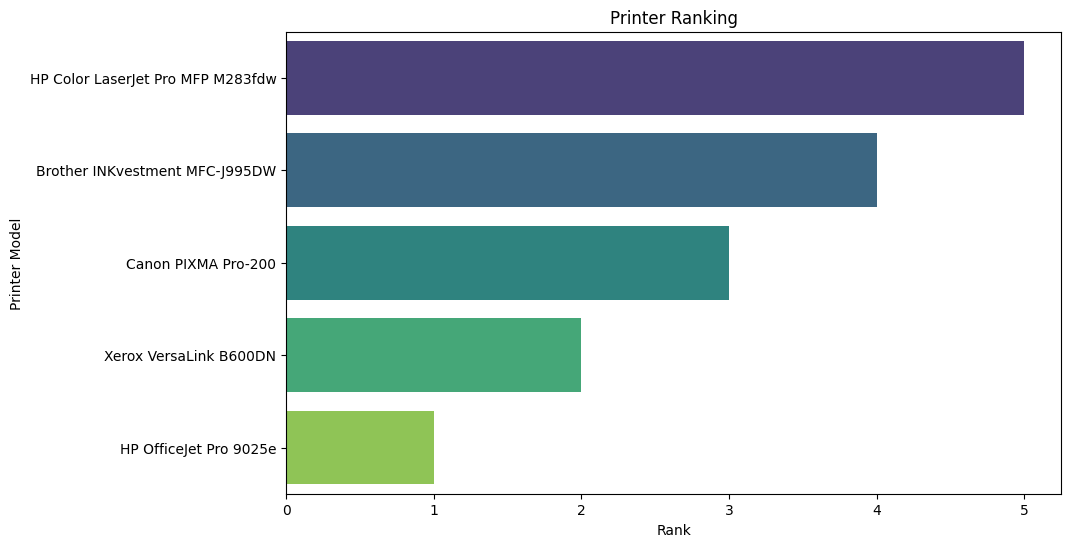

In [60]:
# Bar plot for Rank
plt.figure(figsize=(10, 6))
sns.barplot(x='Rank', y='Printer Model', data=printers_df.sort_values('Rank', ascending=False), palette='viridis')
plt.title('Printer Ranking')
plt.xlabel('Rank')
plt.ylabel('Printer Model')
plt.show()

In [61]:
# Rank the DataFrame in ascending order by 'Weighted Score'
printers_df = printers_df.sort_values(by='Weighted Score', ascending=False)

In [62]:
# Display the final rankings table
print(printers_df[['Printer Model', 'Weighted Score', 'Rank']])

                       Printer Model  Weighted Score  Rank
4             HP OfficeJet Pro 9025e        0.736258   1.0
1             Xerox VersaLink B600DN        0.583450   2.0
2                Canon PIXMA Pro-200        0.535821   3.0
3     Brother INKvestment MFC-J995DW        0.531852   4.0
0  HP Color LaserJet Pro MFP M283fdw        0.452471   5.0


**# CONCLUSION**


1.   **HP OFFICEJET 9025 E -**  Ranks number 1 in the list because it performs all the tasks well whereas other printers lag behind in one of the criterias, that ranks them lower.

2.   **XEROX VERSALINK B600 DN -** Could have been the best printer with fastest scan, lowest cost per print, highest speed per print and good resolution image quality but the only problem with it was it doesnt print colour pages and its cost 10 times higher than the regular home printers.

3. **CANON PIXMA PRO 200 -** Its the best when you want high resolution images and best colour quality prints , with the decent speed and scanning rate but the cost per print can be costly.






